### Clustering and Galaxy Morphology


To work with this data set, we need to install a new image manipulation package called scikit image

pip install -U scikit-image (on MacOs X)

http://scikit-image.org/download.html

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

import skimage
from skimage.transform import resize, rescale
from skimage import io

In [2]:
# Do not execute this cell! This shows how we reduced the size of the
# original data set, with 68,000+ galaxies and 790 Mb

# Data comes from Galaxy Zoo and was used for this Kaggle competition

# https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge

#X = sorted(os.listdir('images_training_rev1')) 

#X_little = sorted(np.random.choice(X,500)) #Let's pick 500 of them

#for el in X_little:
#    os.system('cp images_training_rev1/'+str(el)+' SmallData/')


In [3]:
X_little = sorted(os.listdir('SmallData/')) 

We will want to reduce the size of the original images so that the files become smaller, and the feature array is manageable. The code below shows you an example for the first image in our sample.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Text(0.5,1,'Rescaled image')

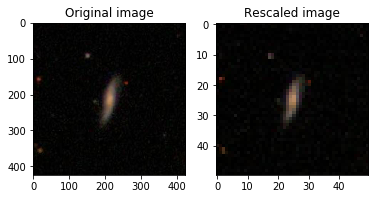

In [25]:
fig, axes = plt.subplots(ncols=2)

ax = axes.ravel()

img = skimage.io.imread('SmallData/'+X_little[0])

img_resized = resize(img,(50,50))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(img_resized, cmap='gray')
ax[1].set_title("Rescaled image")

Q1: What are the sizes of the original and reshaped images, in pixels?

original: 424px*424px
    
reshaped: 50px*50px

Q2: Try changing the size of the rescaled image to (20,20) and (100,100). Which one is the best choice in your opinion, and why?  

We definitely don't want to use 20,20 because the shape of the galaxy becomes too distorted and it's hard to tell distinct features. Going to 100 pixels obviously makes the image clearer, so i think 100,100 is the best option since we can distinguish more features with a higher resollution picture.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Text(0.5,1,'Rescaled image')

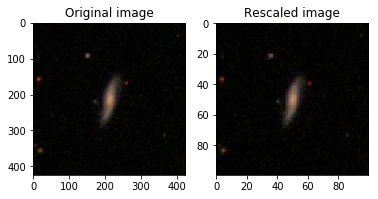

In [26]:
fig, axes = plt.subplots(ncols=2)

ax = axes.ravel()

img = skimage.io.imread('SmallData/'+X_little[0])

img_resized = resize(img,(100,100))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(img_resized, cmap='gray')
ax[1].set_title("Rescaled image")

Q3: Add comments to each line in the following cell.

In [5]:
# Let's resize all the images in the dataset

# This code might take a little while (~15 sec on my machine)

for i in range(len(X_little)): # initializes a for loop that runs from 0 to the number of images we have. 

    img = skimage.io.imread('SmallData/'+X_little[i]) # grabs an image from the file system and stores it into the variable img

    img_resized = resize(img, (50,50)) # resizes the image to 50px by 50px
               
    skimage.io.imsave('Image_'+str(i)+'.png',img_resized) # saves the image as a png file in the current path of the notebook
                                                          # with the prefix Image_ 

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Before proceeding further, open the first image and check its size. You will see that there is more than one "layer" to the image (in other words, the shape is not just 50x50). 

Q4. Plot each of the "layers" of the first image. What do you think they mean? 

Each of the layers corresponds to one of the color channels R (Red), G (Green), or B (Blue).

In [2]:
X_little = sorted(os.listdir('SmallData - Resized/')) 

(50, 50, 3)


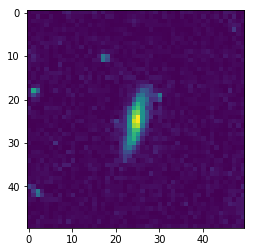

In [3]:
img = skimage.io.imread('SmallData - Resized/'+X_little[0])
print(img.shape)
plt.imshow(img[:,:,0])

(50, 50, 3)


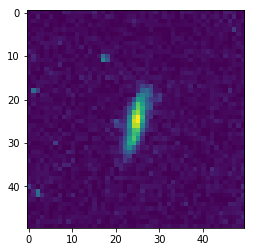

In [29]:
img = skimage.io.imread('SmallData - Resized/'+X_little[0])
print(img.shape)
plt.imshow(img[:,:,1])

(50, 50, 3)


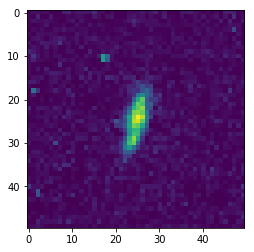

In [30]:
img = skimage.io.imread('SmallData - Resized/'+X_little[0])
print(img.shape)
plt.imshow(img[:,:,2])

The code below reads data from the new images and transforms it 
into a numpy array of features that can be fed through the sklearn pipeline.

In [4]:
images = []
for i in range(len(X_little)):
    img_resized =skimage.io.imread('SmallData - Resized/Image_'+str(i)+'.png')
    length = np.prod(img_resized.shape)
    img = np.reshape(img_resized,length)
    images.append(img)
images = np.vstack(images)

The code below visualizes the first 25 objects in your data set. 
For your convenience, we made these plots to show the first 100 galaxies in the data set, so you can use them to get an idea of how galaxies look like. They are called "Postage_stamps_1.jpg", ....

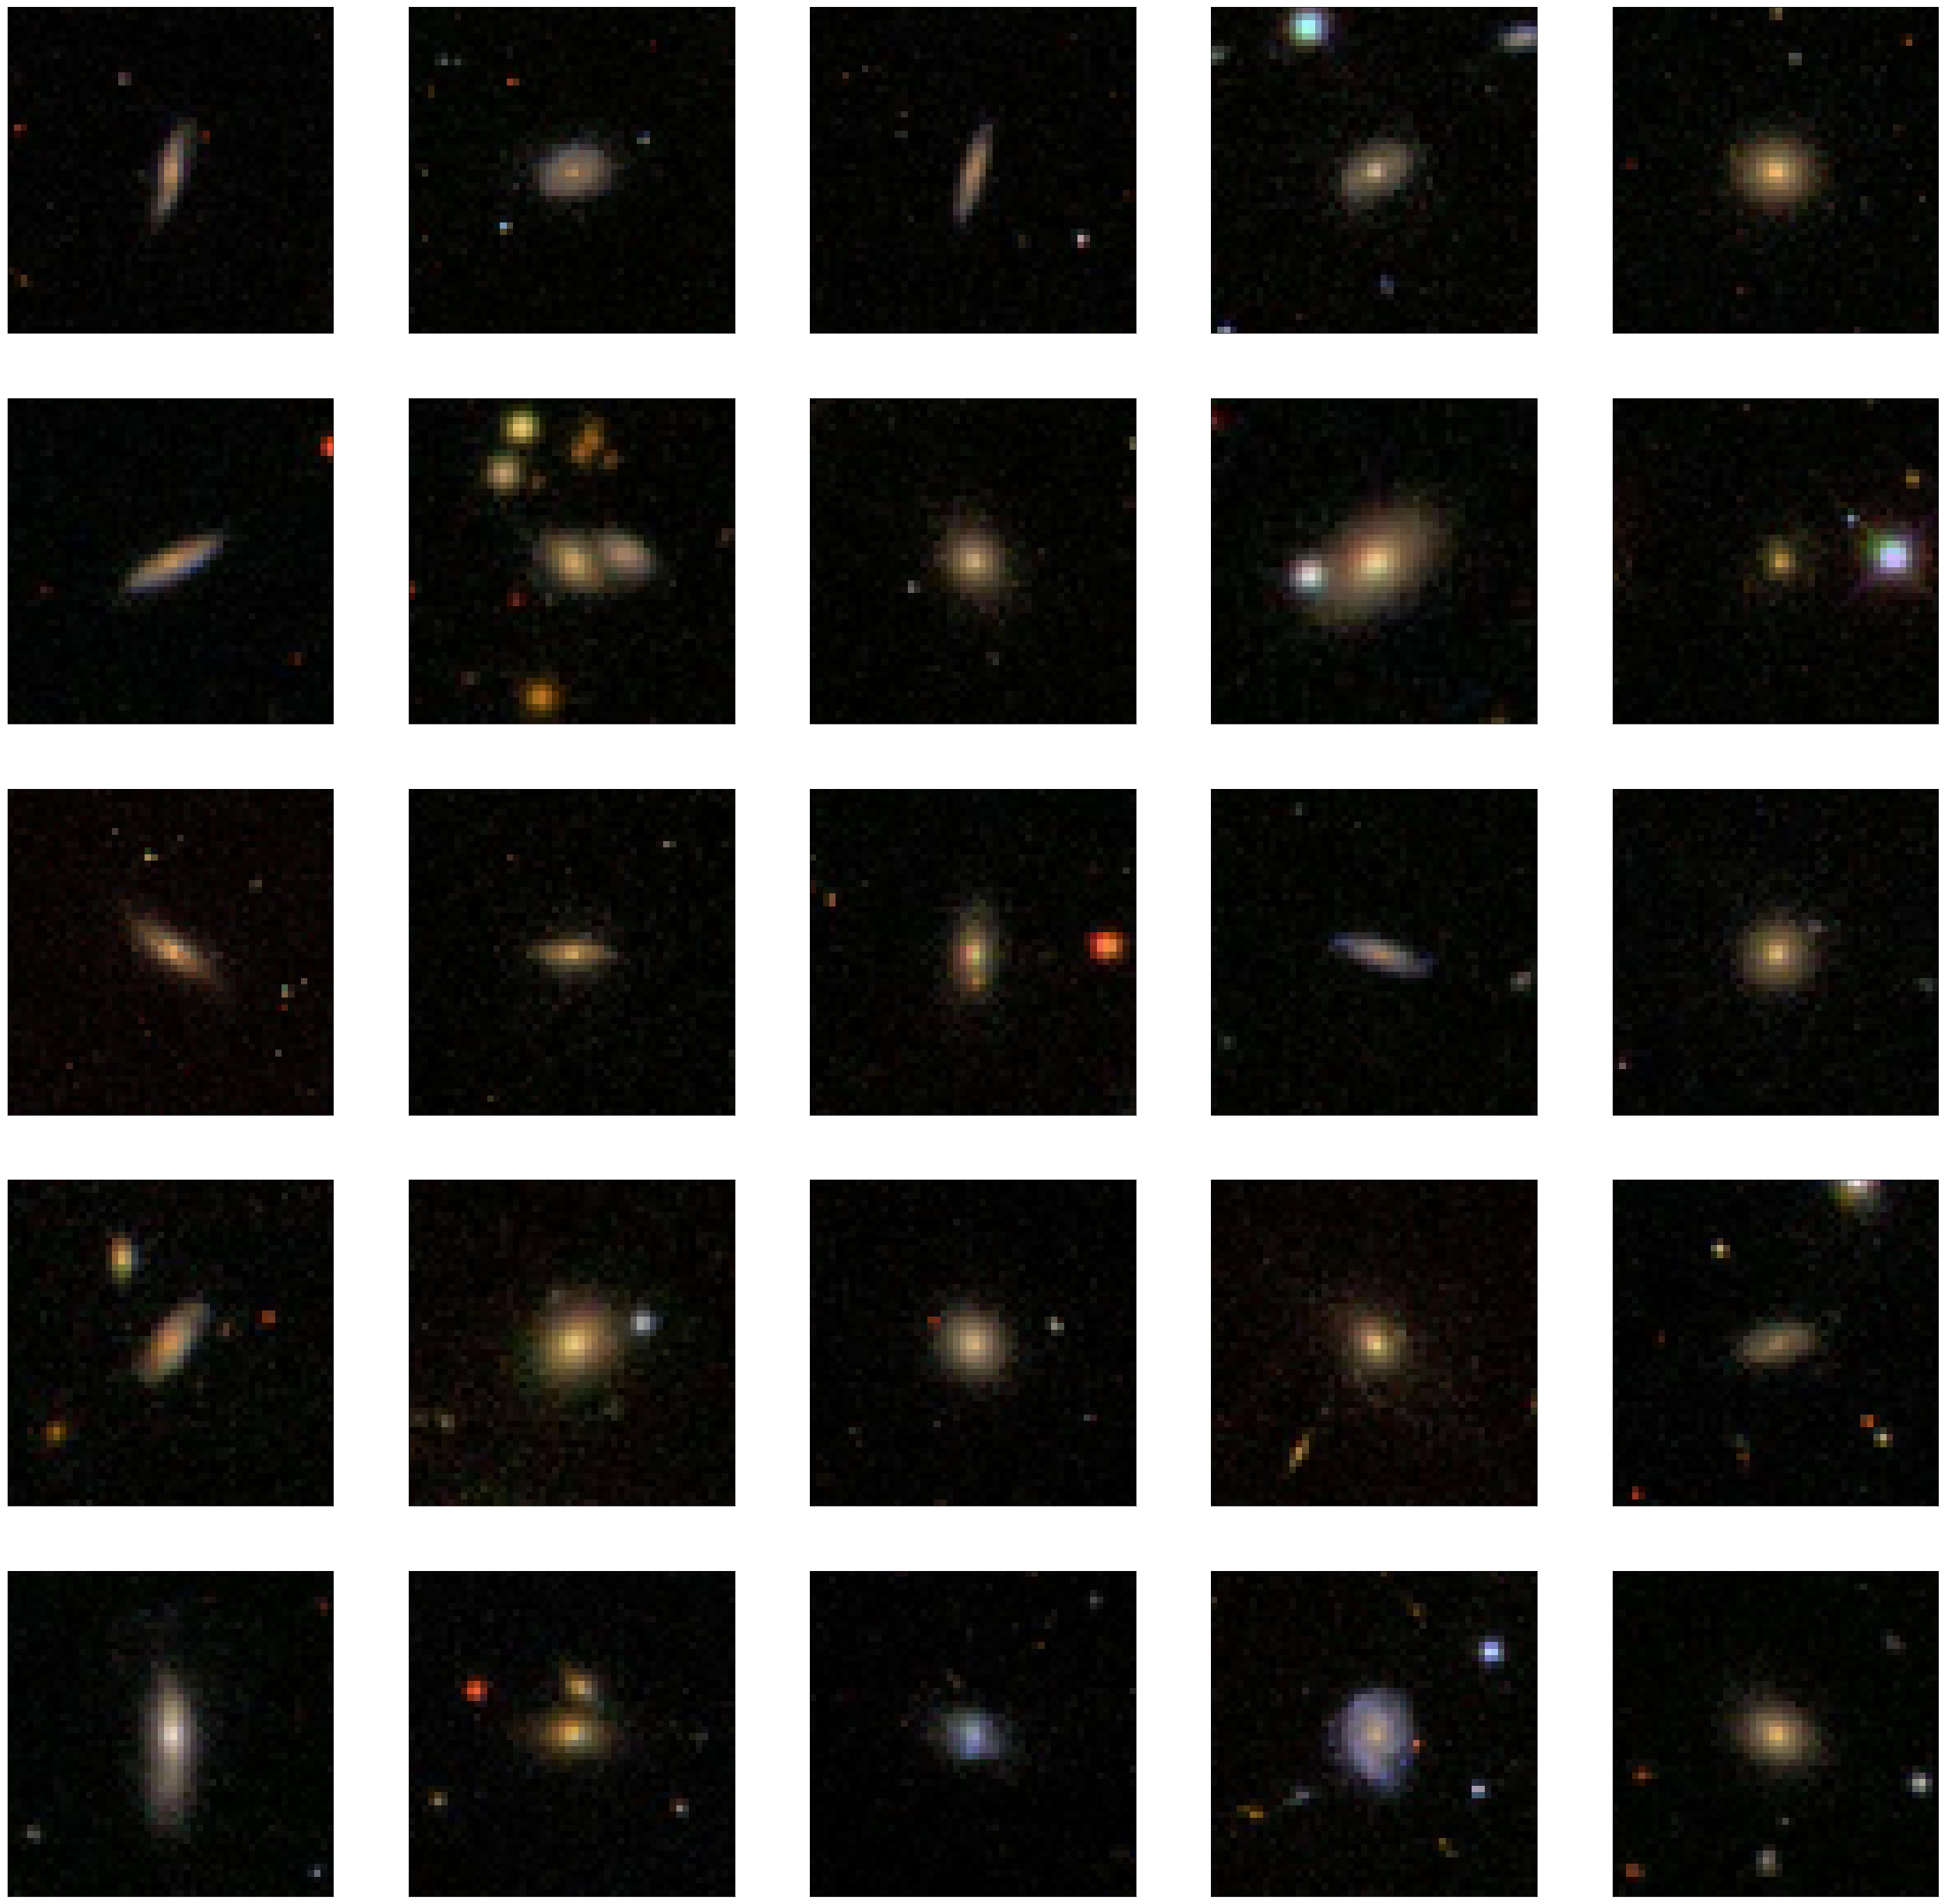

In [8]:
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(50,50))

ax = axes.ravel()

for i in range(ax.shape[0]):

    img = skimage.io.imread('SmallData - Resized/Image_'+str(i)+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    

Q5. Based on your inspection of the first 100 galaxies, what do you think could be a good guess for the number of clusters? (In other words, just visually, how many classes of galaxies do you see?)

I think there should be at least 4 clusters. I think that Oval shaped, circular, and merging galaxies could be clustered in their own groups. Also I notice images with artifacting that could be clustered together.

Let's start with two clusters.

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(images)
y_kmeans = kmeans.predict(images)

In [ ]:
kmeans.

In this case, the predictions (the cluster to which each image belongs to) can only assume the value 0 and 1. Here we show a quick way to show which galaxies are predicted to belong to each cluster; there are other ways that you have used already, e.g. using a mask.

In [10]:
print(np.where([y_kmeans == 0])[1]) 
print(np.where([y_kmeans == 1])[1])
print(len(np.where([y_kmeans == 0])[1]))
print(len(np.where([y_kmeans == 1])[1]))

[  0   1   2   3   5   7   9  10  11  12  13  14  15  17  18  19  21  22
  24  26  27  28  29  30  32  34  35  36  38  39  40  41  42  43  44  45
  46  48  49  50  51  53  56  57  58  60  61  62  63  66  67  68  69  75
  76  77  78  79  81  82  84  85  87  89  90  92  94  95  96 100 102 103
 106 108 109 110 112 114 115 116 117 119 120 121 122 123 124 126 127 128
 129 130 132 133 135 136 137 138 144 146 148 149 150 151 152 153 154 156
 157 158 160 161 163 165 166 170 171 172 173 176 177 178 181 182 183 185
 188 191 192 194 196 198 199 200 201 202 204 207 210 211 212 214 215 216
 218 219 220 223 225 226 227 232 233 234 236 237 238 240 241 245 246 247
 249 250 253 254 256 258 259 260 262 263 264 265 266 268 270 272 275 276
 277 278 279 280 281 284 285 287 289 291 292 293 294 295 296 298 299 300
 301 302 304 306 308 309 311 312 313 314 318 320 321 322 324 325 326 327
 328 329 330 331 334 335 337 341 342 344 345 346 347 348 349 350 351 352
 354 357 358 359 360 361 362 365 368 369 370 371 37

We can use the code below to take a look at 25 galaxies that were placed in the first cluster and see if they look somehow alike.

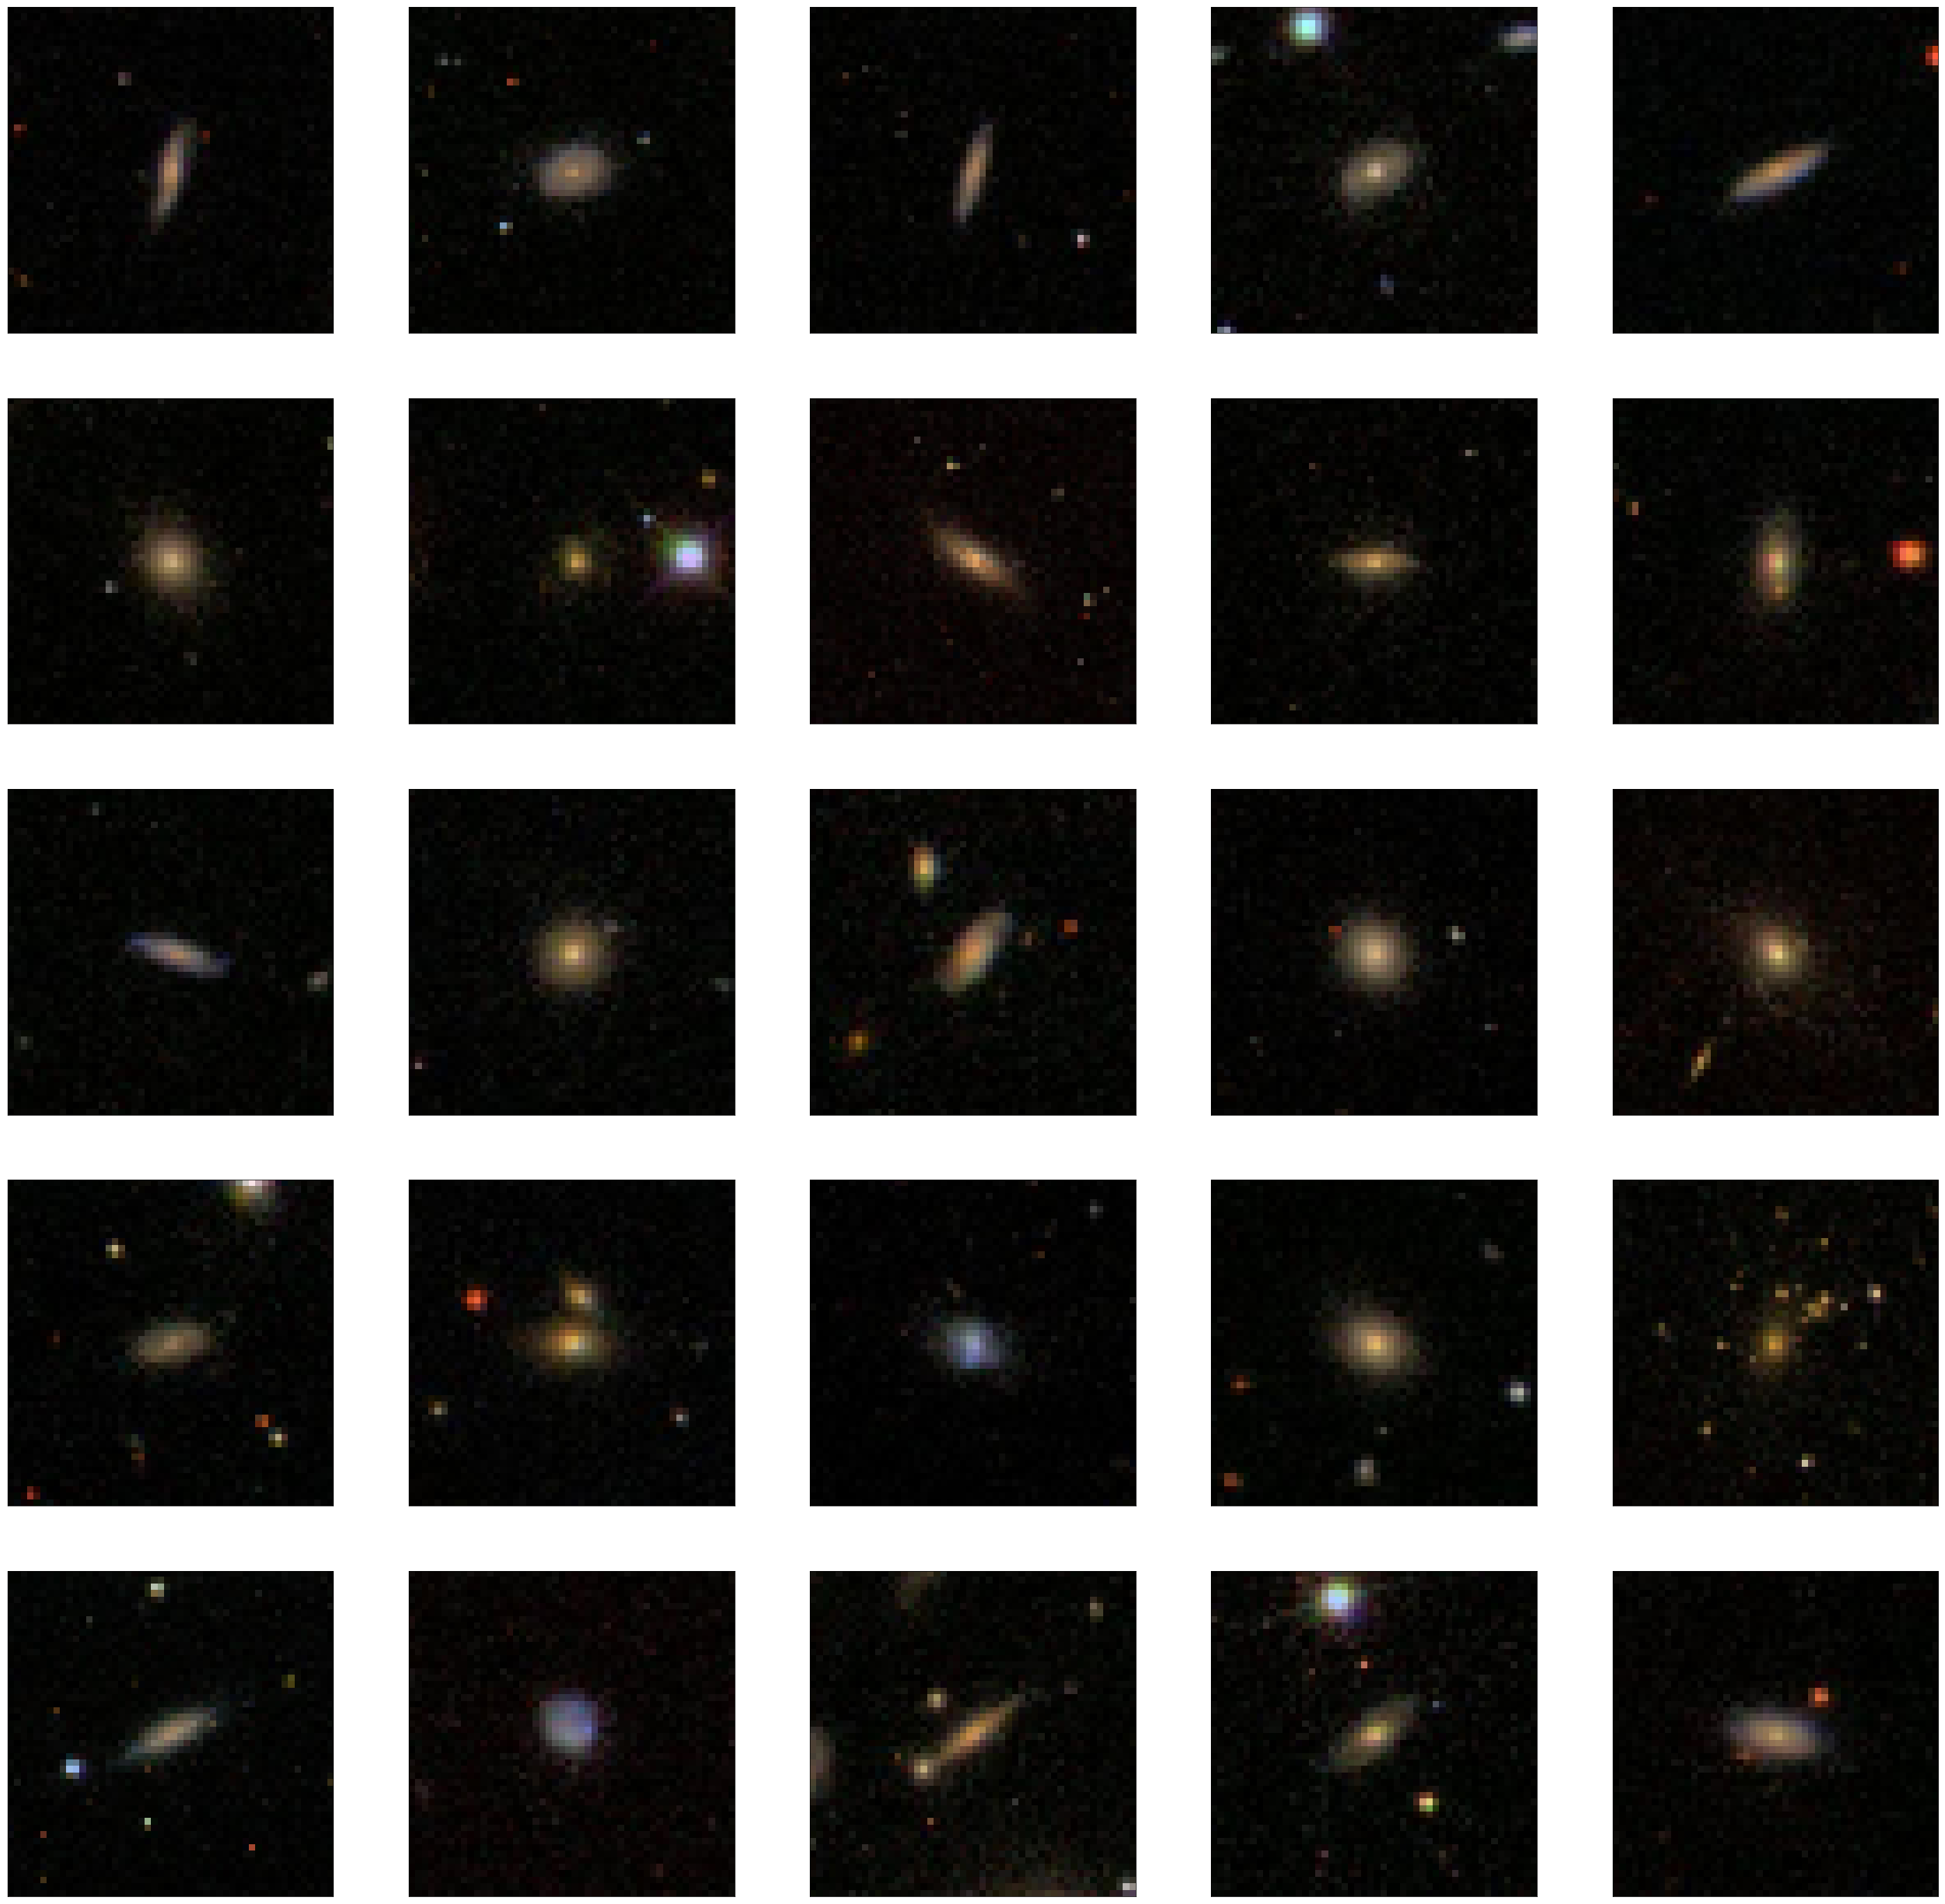

In [11]:
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(50,50))

ax = axes.ravel()

for i in range(min(len(np.where([y_kmeans == 0])[1]),25)):
    #the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('SmallData - Resized/Image_'+str(np.where([y_kmeans == 0])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

Let's now do the same thing ut with five clusters.

Q6: Build a K-Means algorithm for this data set with five clusters. Choose initial conditions wisely :) 

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=50)
kmeans.fit(images)
y_kmeans = kmeans.predict(images)

Q7: Calculate and show how many objects are assigned to each cluster.

In [30]:
for i in range(5):
    print("Cluster",(i+1),"has",len(np.where([y_kmeans == i])[1]),"objects")


Cluster 1 has 3 objects
Cluster 2 has 82 objects
Cluster 3 has 5 objects
Cluster 4 has 226 objects
Cluster 5 has 183 objects


Q8: For each one of the clusters, plot the first 25 galaxies assigned to each cluster (or all of them if they are < 25). You can do this with minimal modification to the code above.

# Cluster 1

Text(0.5,1,'Cluster 1')

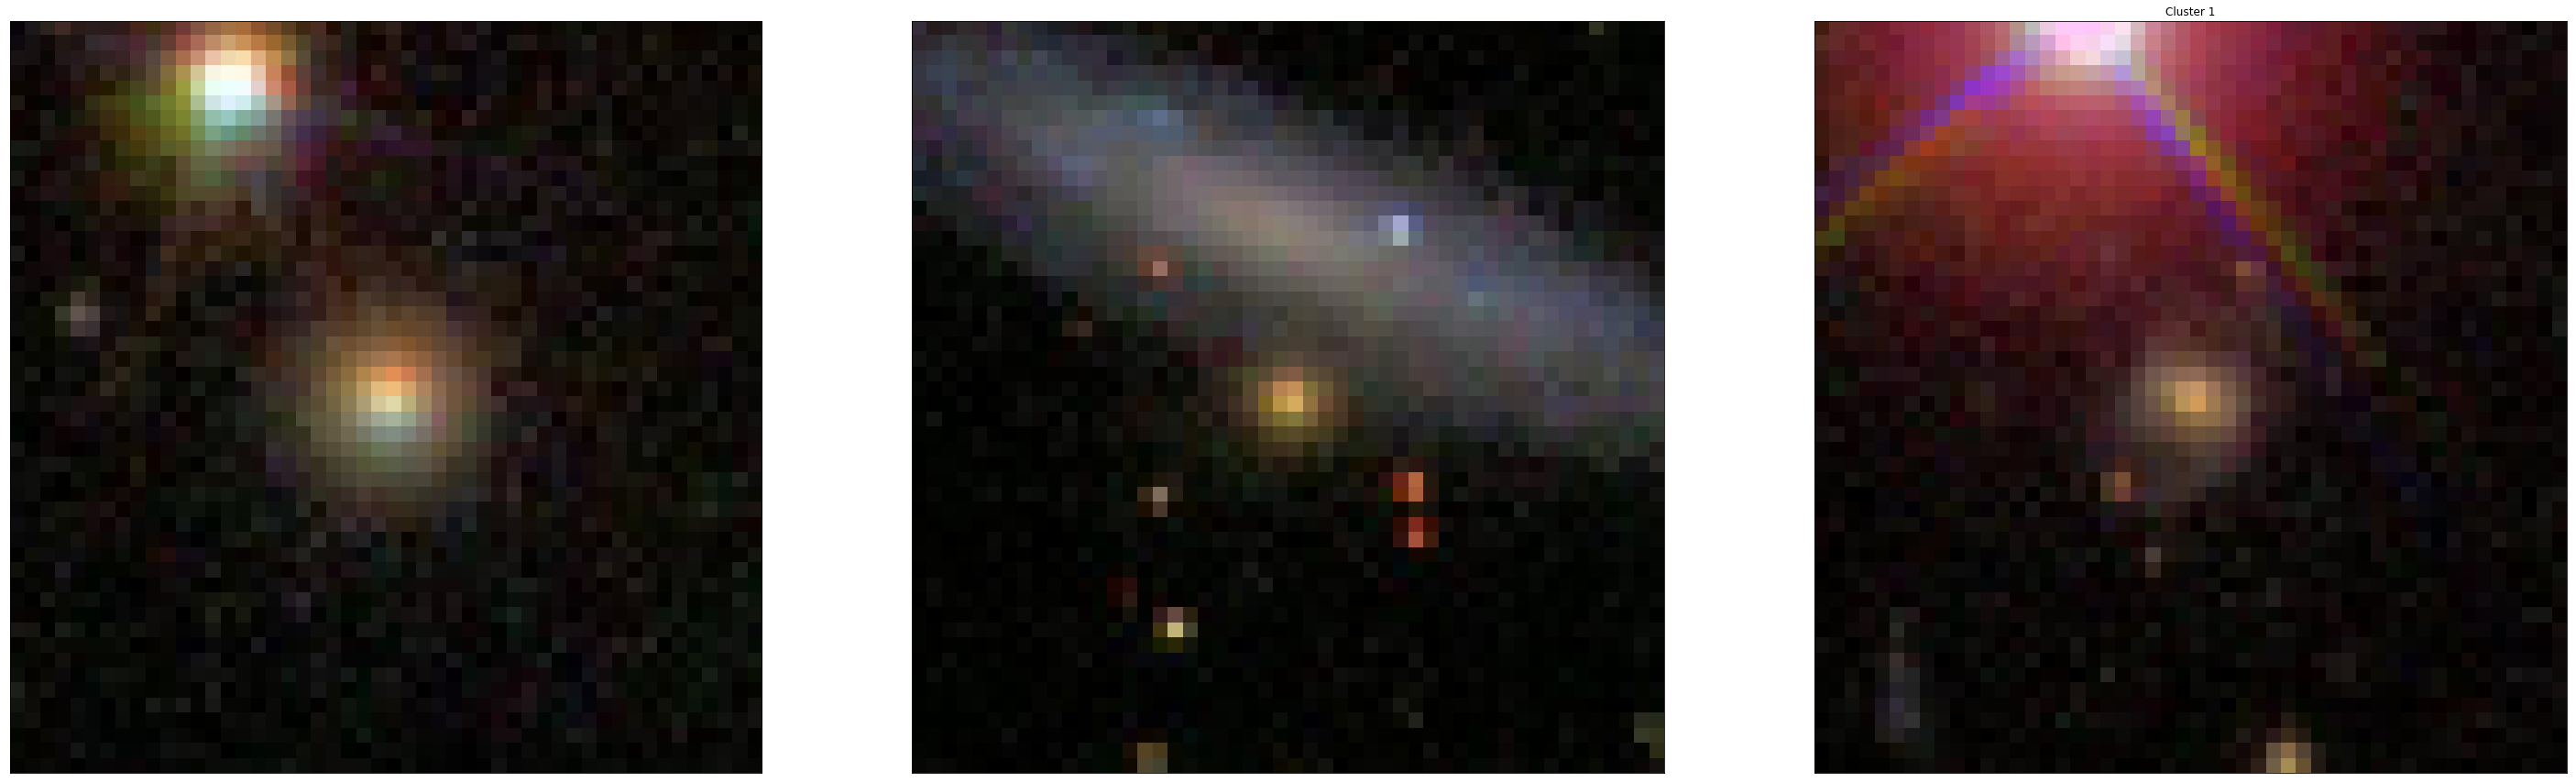

In [31]:
fig, axes = plt.subplots(ncols= 3, nrows = 1,figsize=(50,50))

ax = axes.ravel()


for i in range(min(len(np.where([y_kmeans == 0])[1]),25)):
    #the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('SmallData - Resized/Image_'+str(np.where([y_kmeans == 0])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.title("Cluster 1")


# Cluster 2

Text(0.5,1,'Cluster 2')

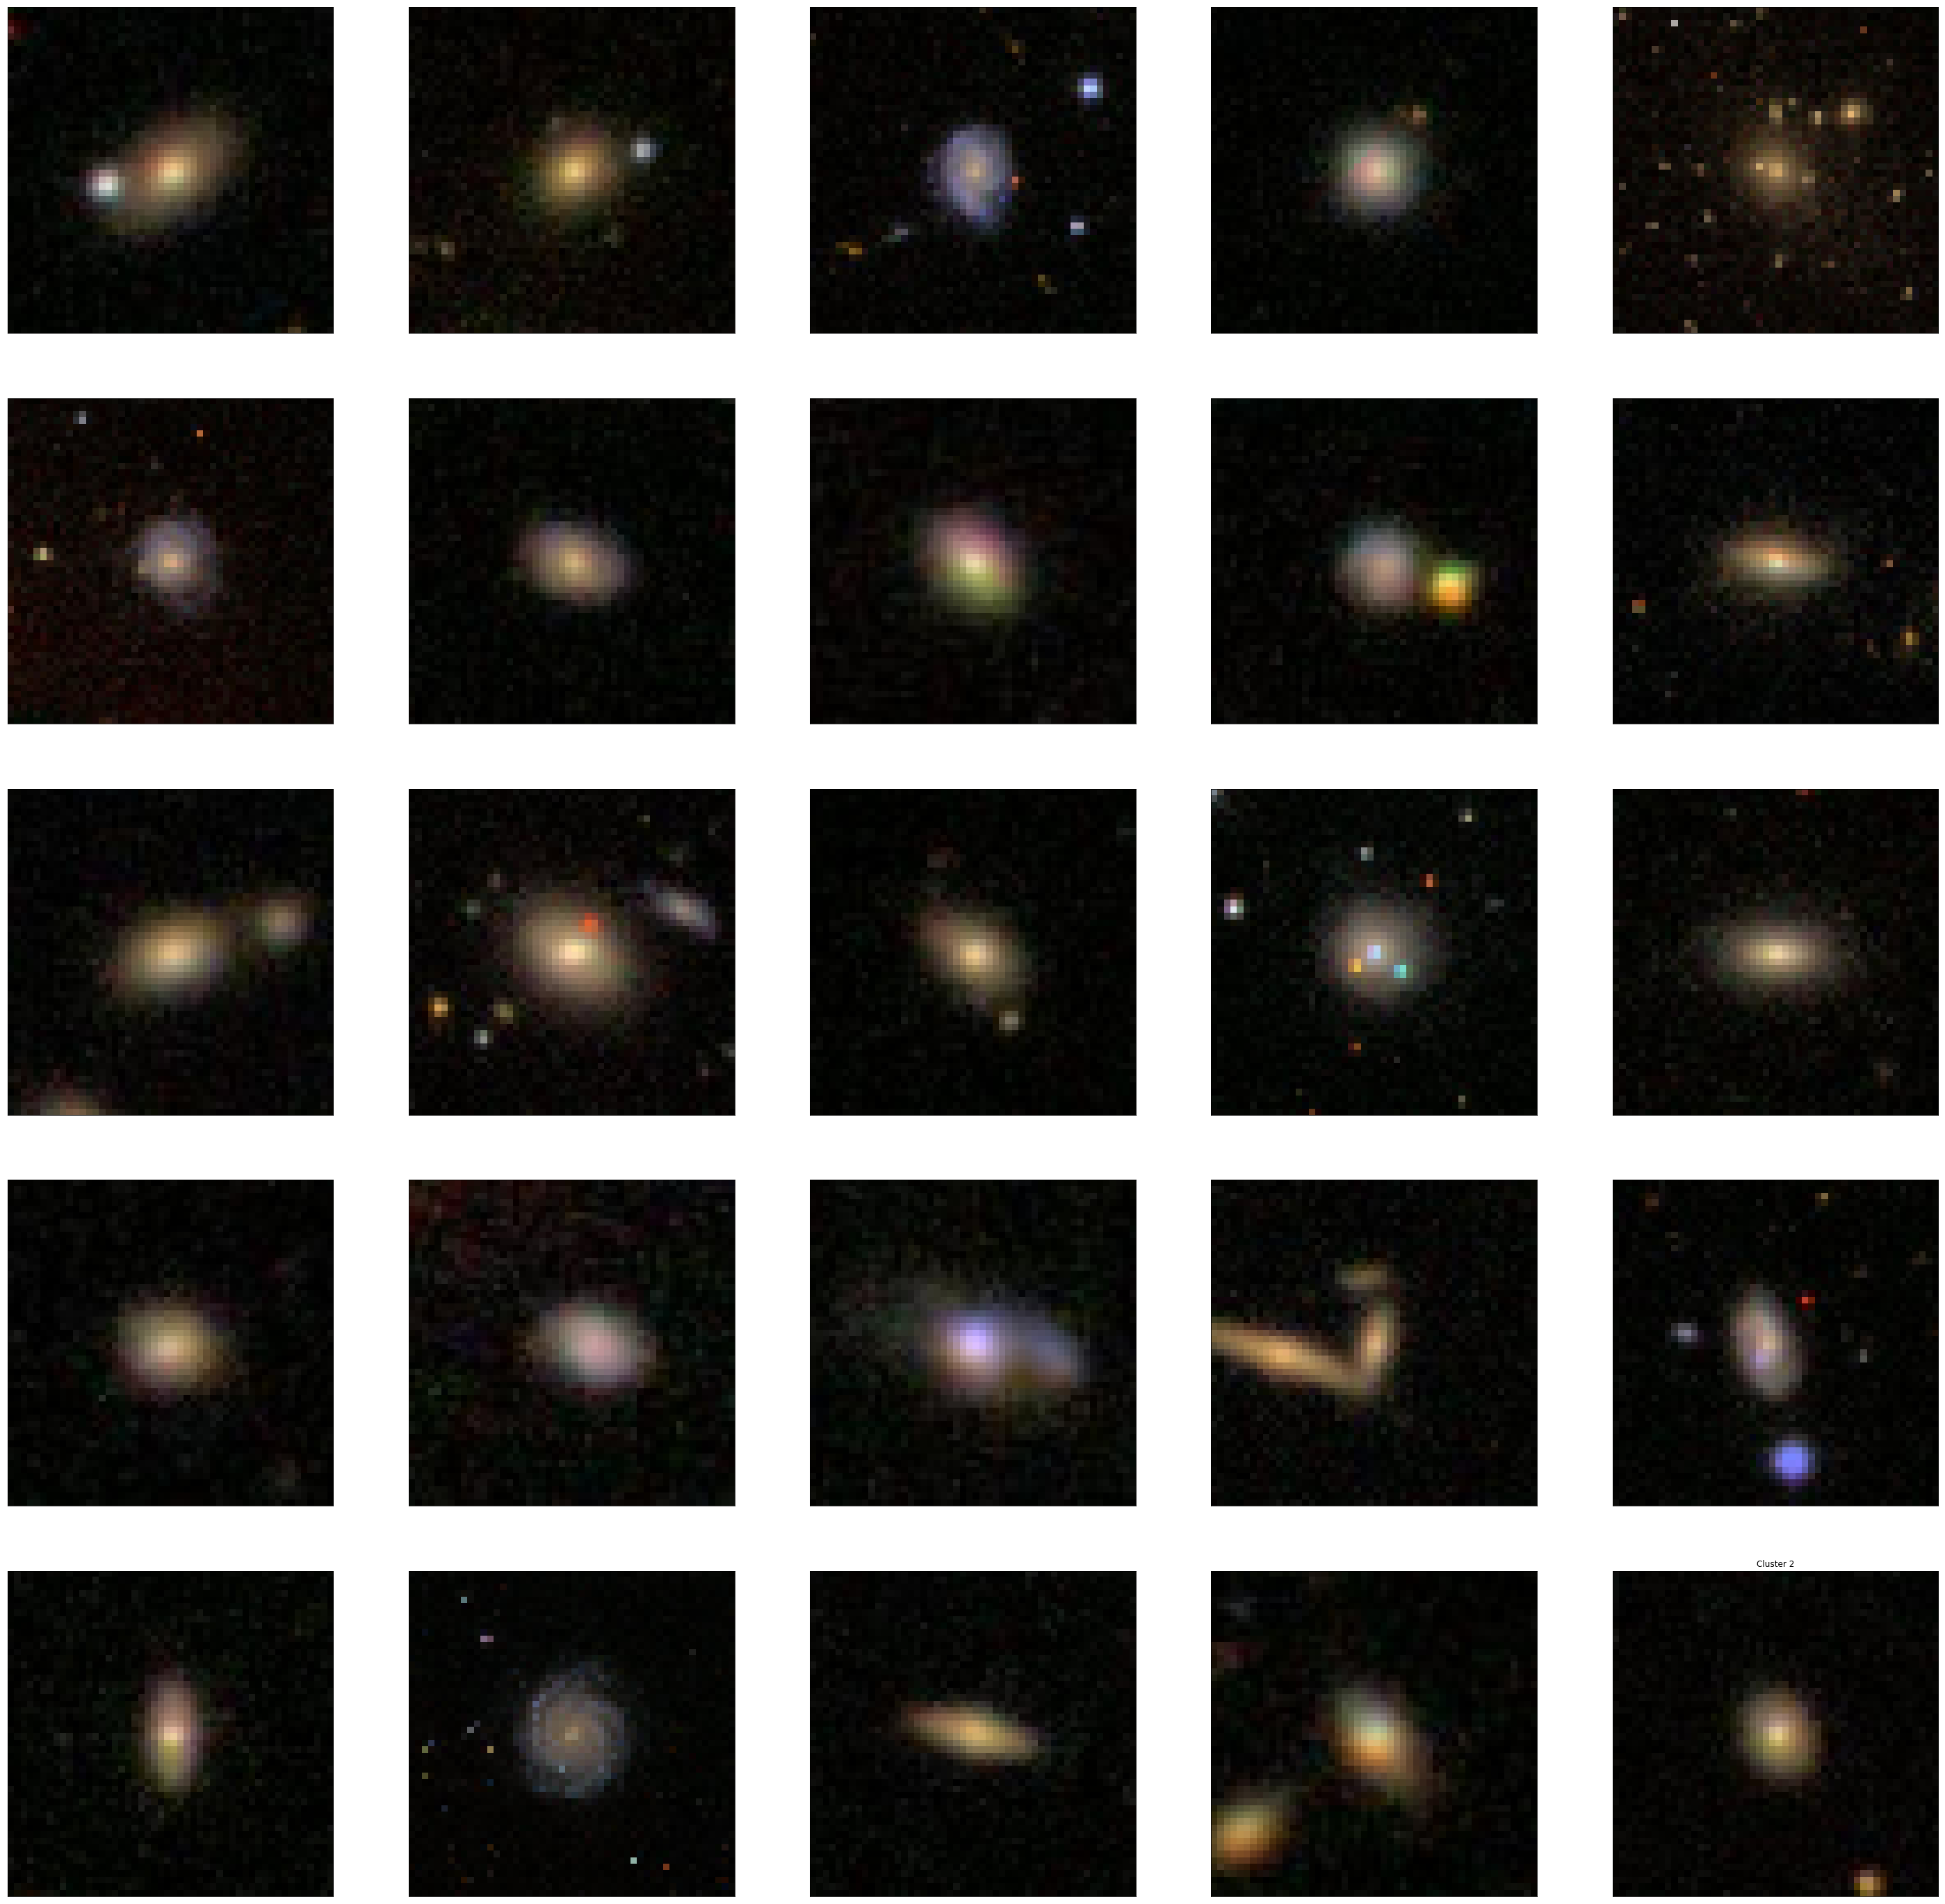

In [32]:
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(50,50))

ax = axes.ravel()


for i in range(min(len(np.where([y_kmeans == 1])[1]),25)):
    #the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('SmallData - Resized/Image_'+str(np.where([y_kmeans == 1])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.title("Cluster 2")

# Cluster 3

Text(0.5,1,'Cluster 3')

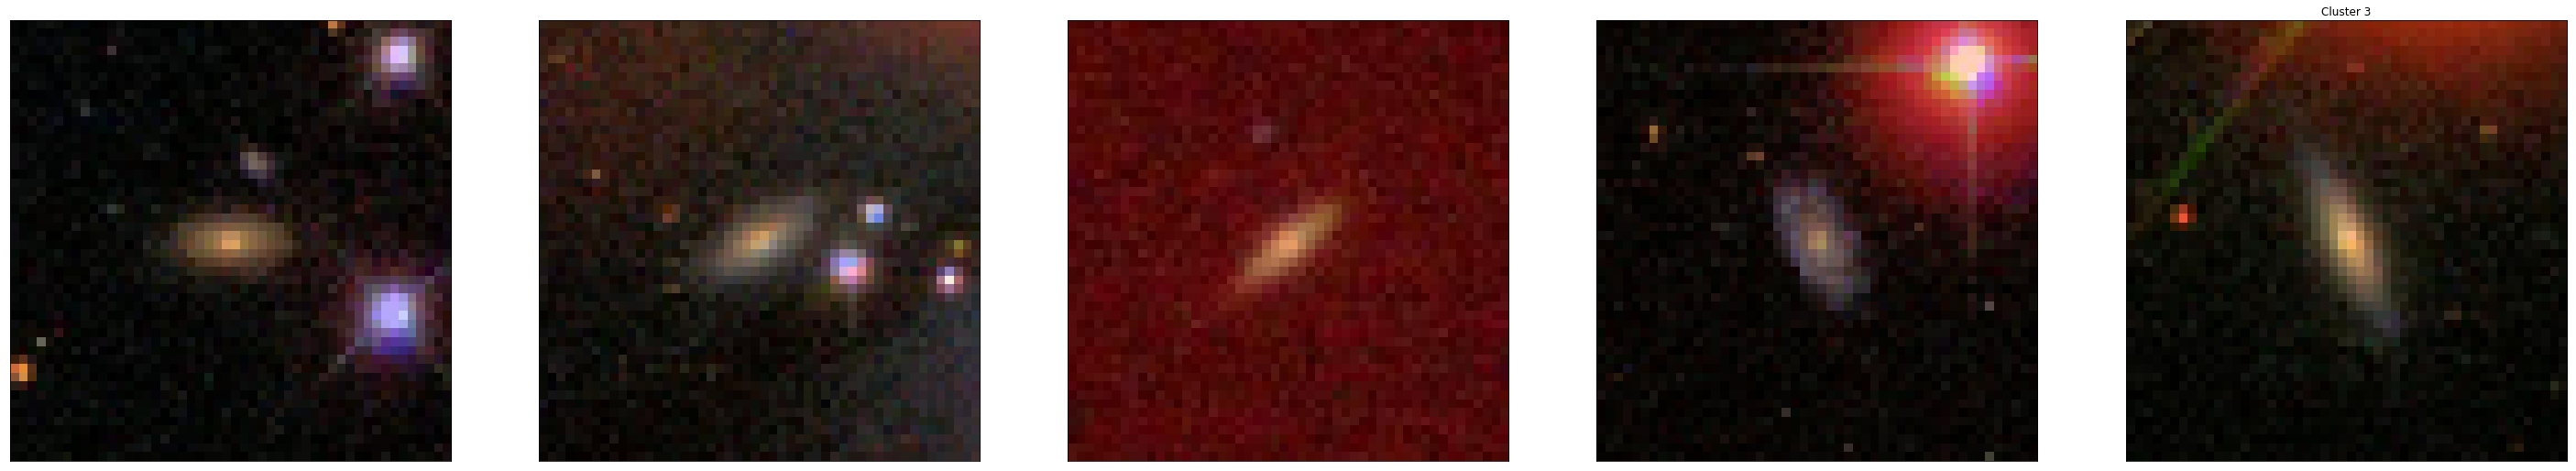

In [33]:
fig, axes = plt.subplots(ncols= 5, nrows = 1,figsize=(50,50))

ax = axes.ravel()


for i in range(min(len(np.where([y_kmeans == 2])[1]),25)):
    #the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('SmallData - Resized/Image_'+str(np.where([y_kmeans == 2])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.title("Cluster 3")

# Cluster 4

Text(0.5,1,'Cluster 4')

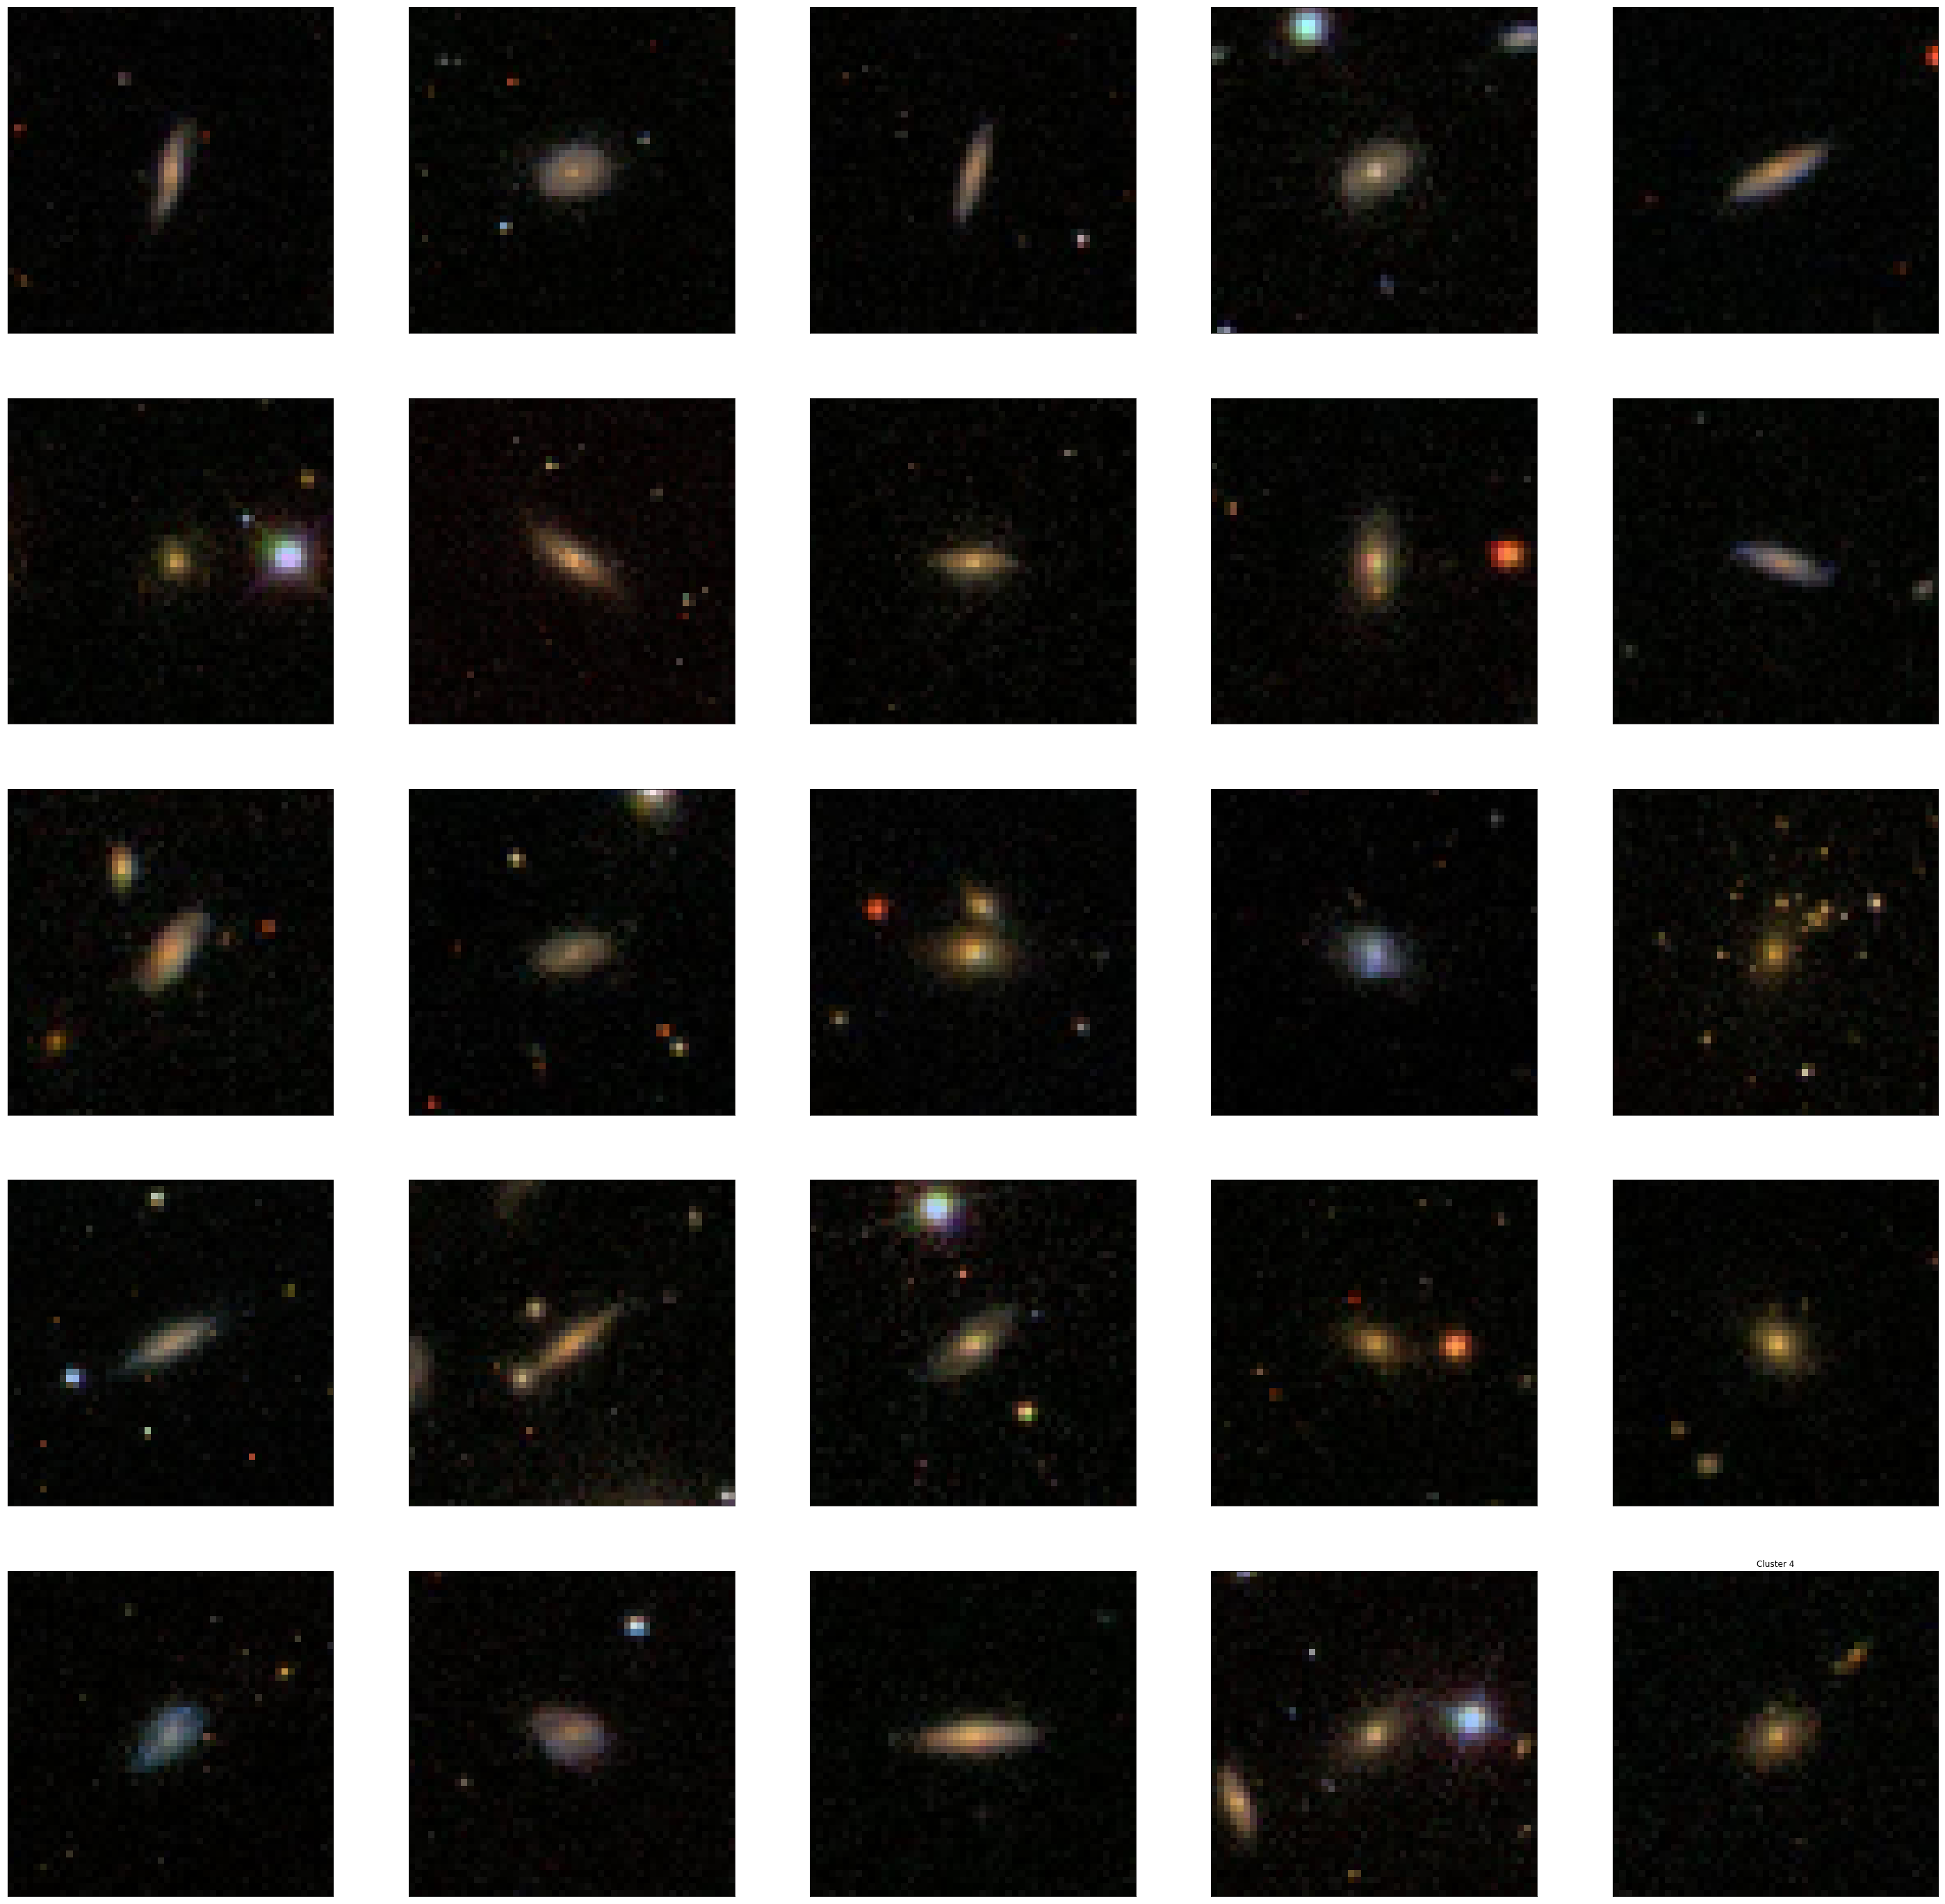

In [37]:
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(50,50))

ax = axes.ravel()


for i in range(min(len(np.where([y_kmeans == 3])[1]),25)):
    #the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('SmallData - Resized/Image_'+str(np.where([y_kmeans == 3])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.title("Cluster 4")

# Cluster 5

Text(0.5,1,'Cluster 5')

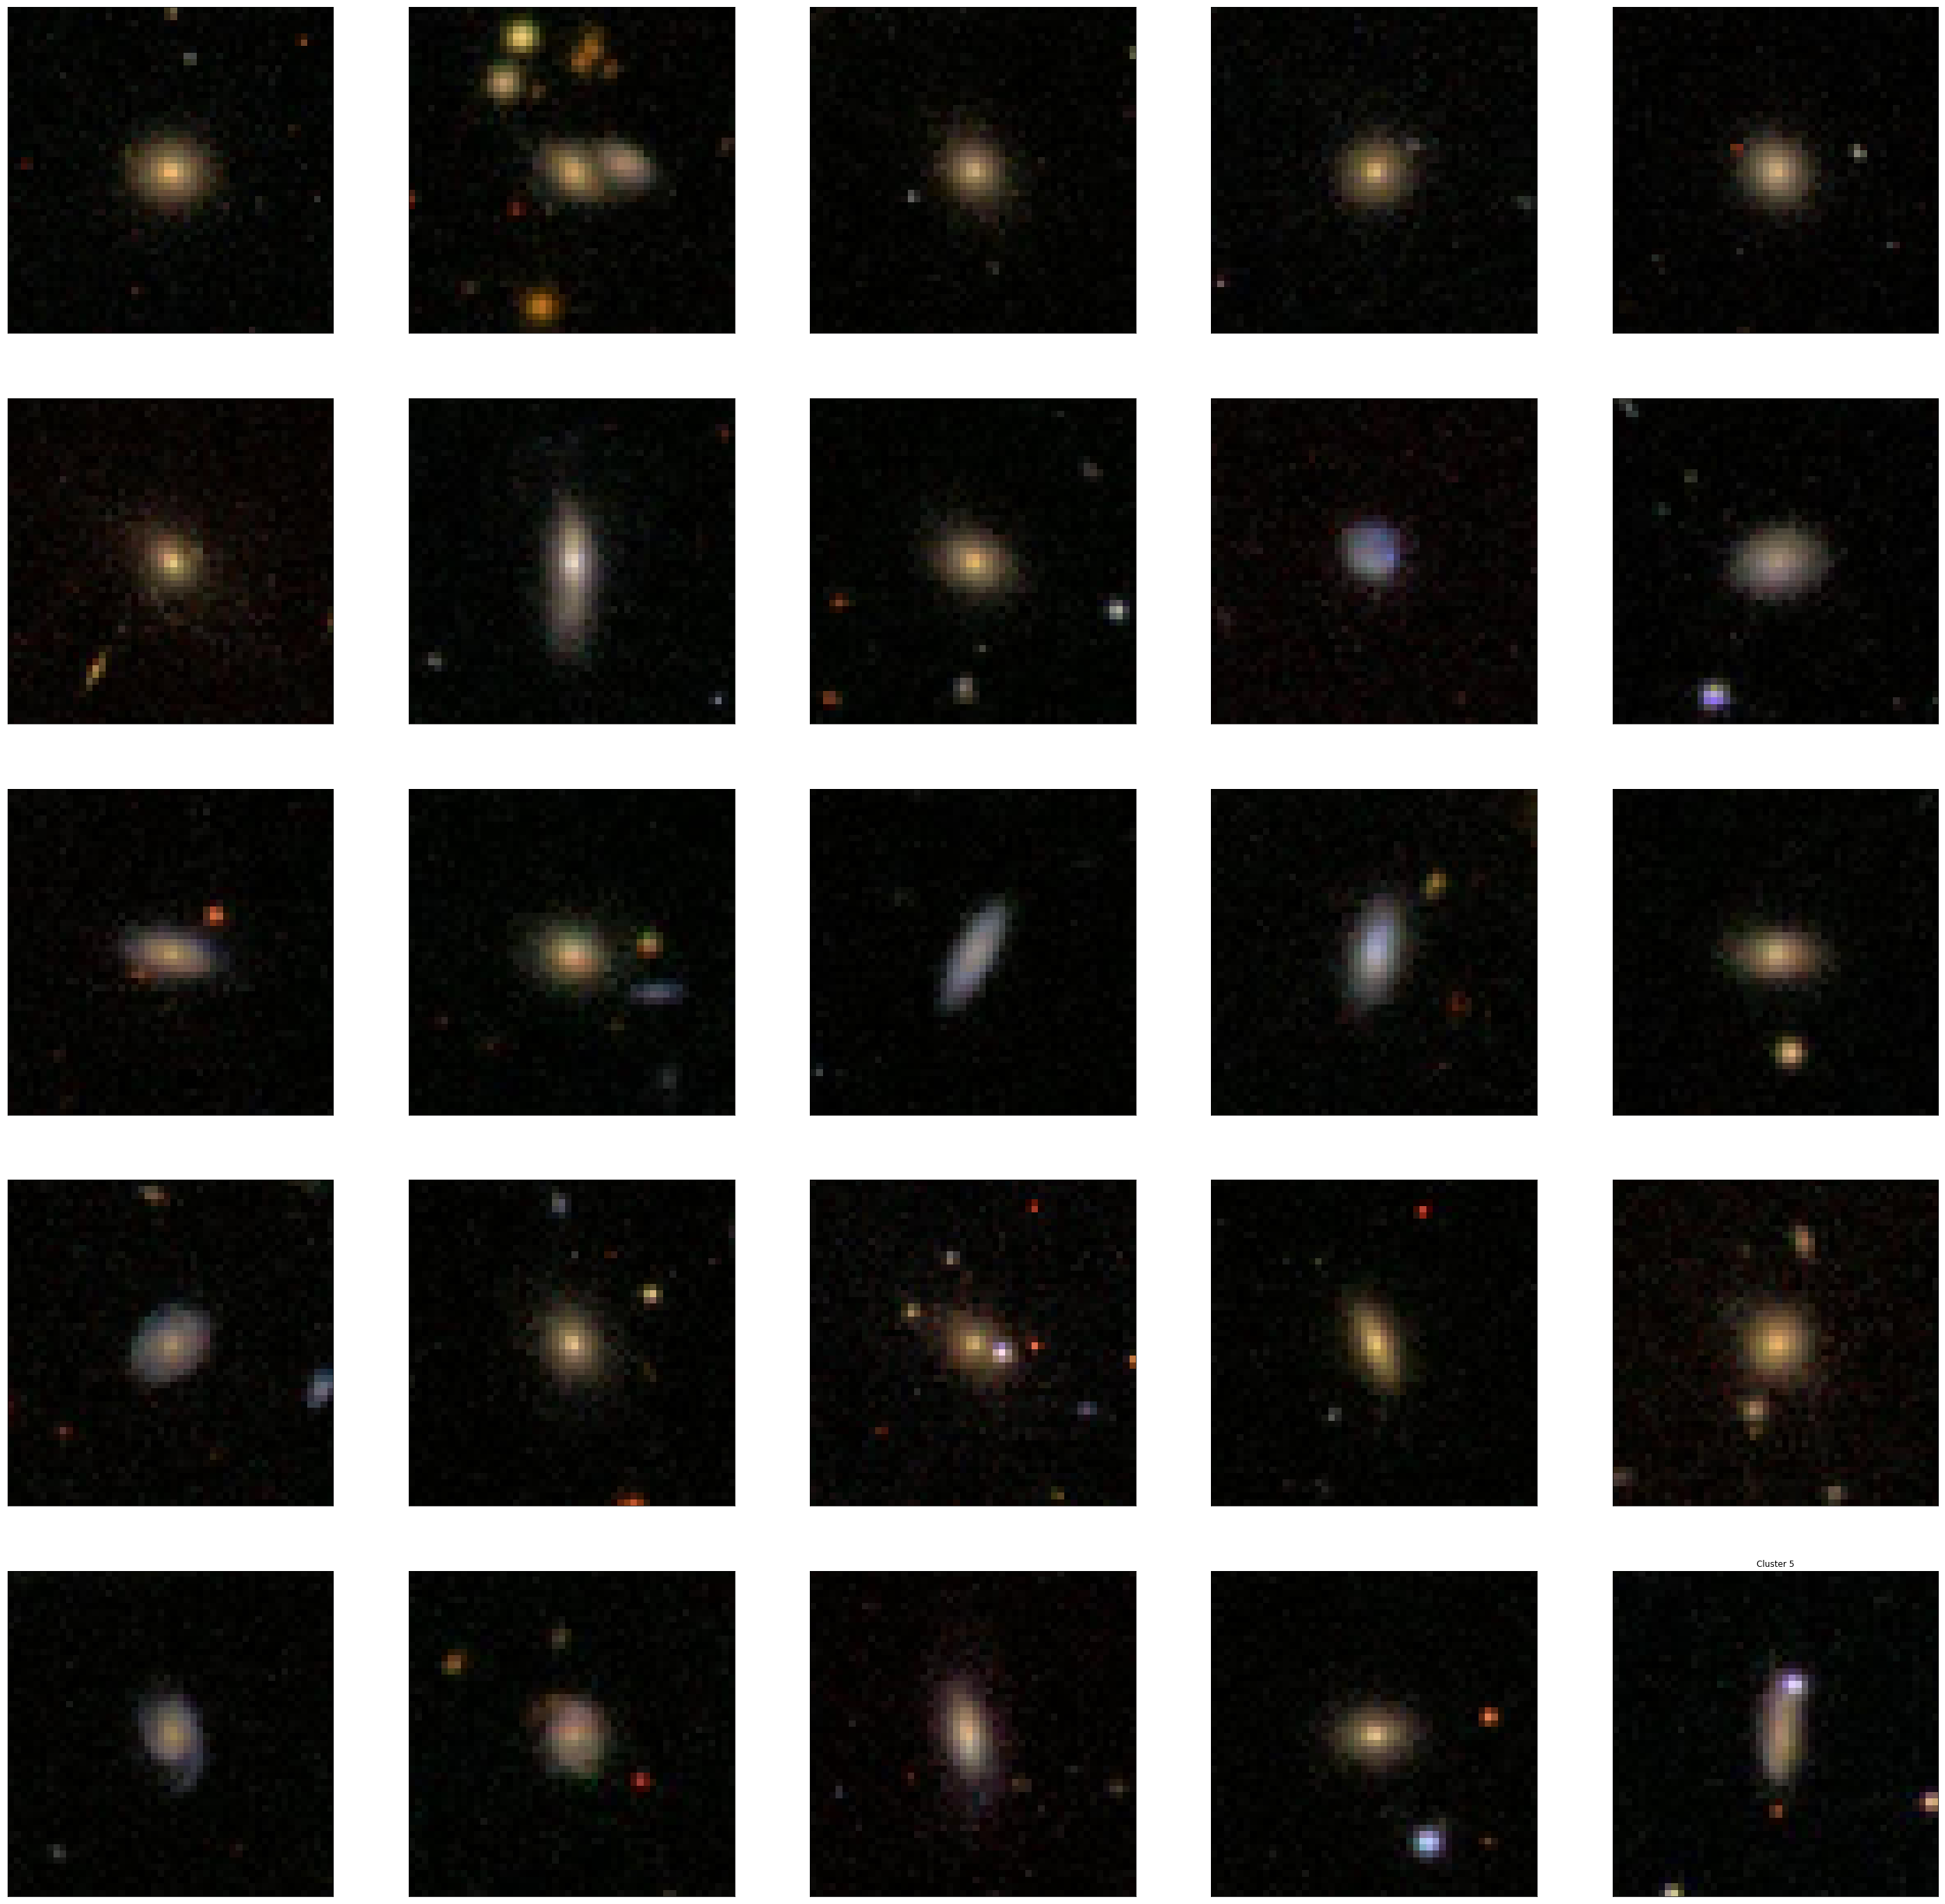

In [36]:
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(50,50))

ax = axes.ravel()


for i in range(min(len(np.where([y_kmeans == 4])[1]),25)):
    #the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('SmallData - Resized/Image_'+str(np.where([y_kmeans == 4])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.title("Cluster 5")

Q9: Describe some similarities and the differences between galaxies in the same cluster. Do you think the algorithm has figured out an efficient way of grouping galaxies with similar morphology?

One similarity I see in images within clusters 3 and 4 is the ovality of the galaxy. Most galaxies in these imgages seem to be very cigar shaped. In the other clusters, there are some cigar/oval galaxies but most are circular spiral galaxies.

A difference is the number of galaxies other than the central galaxy. The amount varies greatly between all the pictures in each cluster. 

Q10: Build a k-means clustering model with five clusters using a different (larger) size for the images, for example 100x100. (You will have to build the data set again). Compare the results to the previous run, for example looking at the distribution of assigned clusters, or visually looking at galaxies assigned to the same cluster. Do you think results are changing significantly?

The distribution of the images diesn't change significantly. We see that we are still getting two clusters with very little images and the rest of the clusters also seem to have simillar amounts of images as before. 

In [5]:
for i in range(len(X_little)):

    img = skimage.io.imread('SmallData/'+X_little[i])

    img_resized = resize(img, (100,100))
               
    skimage.io.imsave('SmallData - Resized2/Image_'+str(i)+'.png',img_resized)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [6]:
from sklearn.cluster import KMeans

In [34]:
images = []
for i in range(len(X_little)):
    img_resized =skimage.io.imread('SmallData - Resized2/Image_'+str(i)+'.png')
    length = np.prod(img_resized.shape)
    img = np.reshape(img_resized,length)
    images.append(img)
images = np.vstack(images)

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=50)
kmeans.fit(images)
y_kmeans = kmeans.predict(images)

In [15]:
for i in range(5):
    print("Cluster",(i+1),"has",len(np.where([y_kmeans == i])[1]),"objects")

Cluster 1 has 6 objects
Cluster 2 has 174 objects
Cluster 3 has 4 objects
Cluster 4 has 250 objects
Cluster 5 has 65 objects


EC: The code below is an implementation of the so-called "Elbow method" to determine the optimal number of clusters. Research the "Elbow method" so you can understand what is going on. Based on your reading and the figure below, is there an optimal number of clusters?

5 seems to be the optimal number of clusters because after that, we start to have diminishing returns for our sum of squared errors

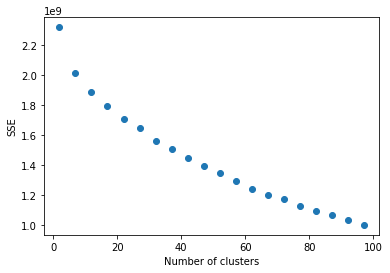

In [20]:
sse = []
for k in range(2, 100, 5): #might take a while, implementing k-means a few times
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=100).fit(images)
    sse.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.scatter(range(2, 100, 5), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Not EC but in case you are interested: Affinity Propagation is another tool used in scikit to attempt to determine the number of clusters, and the silhouette score of a cluster distribution. Example code below for your perusal.

In [37]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [36]:
# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(images)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(images, labels, metric='sqeuclidean'))